<a href="https://colab.research.google.com/github/luongdiem2005/movie-ratings-analysis/blob/main/p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Size of movies:  (9742, 3)

First 5 lines of movies: 
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Size of ratings:  (100836, 4)

First 5 lines of ratings: 
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Missing values of movies: 
movieId    

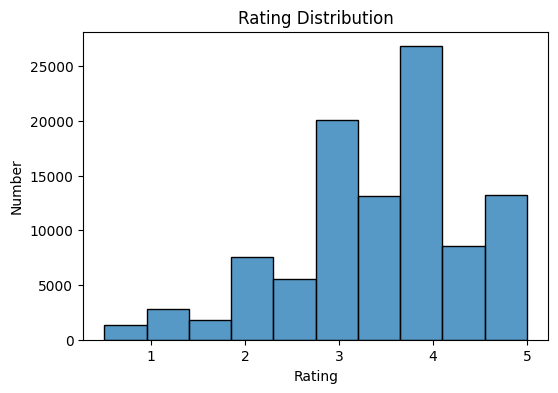


Top 10 most rated movies: 
      movieId                                      title
97        110                          Braveheart (1995)
224       260  Star Wars: Episode IV - A New Hope (1977)
257       296                        Pulp Fiction (1994)
277       318           Shawshank Redemption, The (1994)
314       356                        Forrest Gump (1994)
418       480                       Jurassic Park (1993)
461       527                    Schindler's List (1993)
507       589          Terminator 2: Judgment Day (1991)
510       593           Silence of the Lambs, The (1991)
1939     2571                         Matrix, The (1999)


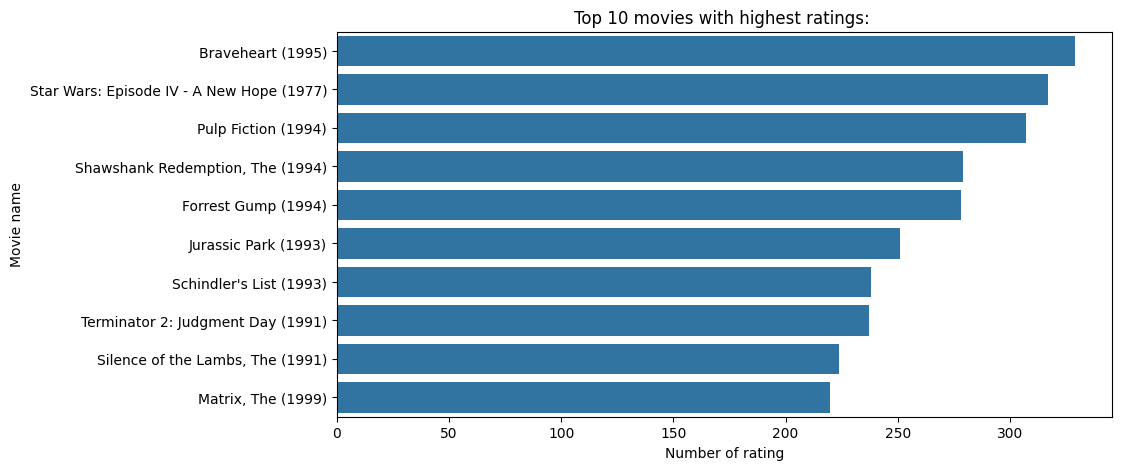

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base = "/content/drive/MyDrive/projects/movie-ratings-analysis"
movies = pd.read_csv(f"{base}/data/movies.csv")
ratings = pd.read_csv(f"{base}/data/ratings.csv")

# Basic information
print("Size of movies: ", movies.shape)
print("\nFirst 5 lines of movies: ")
print(movies.head())
print("Size of ratings: ", ratings.shape)
print("\nFirst 5 lines of ratings: ")
print(ratings.head())

# Checking missing values
print("\nMissing values of movies: ")
print(movies.isnull().sum())
print("\nMissing values of ratings:  ")
print(ratings.isnull().sum())

# Basic statistics
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = ratings.shape[0]
print(f"\nNumber of users: {n_users}")
print(f"\nNumber of movies: {n_movies}")
print(f"\nTotal ratings: {n_ratings}")
print("\nRating description: ")
print(ratings['rating'].describe())

# Rating distribution chart
plt.figure(figsize=(6,4))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number")
plt.show()

#Top 10 movies with highest ratings
movies_counts = ratings['movieId'].value_counts().head(10)
top_movies = movies[movies['movieId'].isin(movies_counts.index)]
print("\nTop 10 most rated movies: ")
print(top_movies[['movieId', 'title']])
plt.figure(figsize=(10,5))
sns.barplot(x=movies_counts.values, y=top_movies['title'])
plt.title("Top 10 movies with highest ratings: ")
plt.xlabel("Number of rating")
plt.ylabel("Movie name")
plt.show()